<a href="https://colab.research.google.com/github/sebinsaji007/market-pattern-recognition/blob/main/Code_for_labeling_and_training_GC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

First, it is connected to the repository where the data is stored, on the one hand the raw market data, from which the patterns are labeled. On the other hand, also to store the labeled patterns that will later be used to train a neural network.

Next, the necessary libraries for data processing and visualization are imported.

In [1]:
# It connects to the repository to obtain the necessary data to be used throughout the execution of this google colab document.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN

In [3]:
#Utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.linear_model import LinearRegression
import os
from datetime import datetime

In [4]:
#Library for visualization of data on candlestick charts
!pip install mpl_finance
import mpl_finance as mpf



---



# Extra functions

Necessary functions are defined for the process of labeling the patterns and transforming them. On the one hand, the function "pattern_show_image" is used to observe the pattern identified from trend rules and to confirm visually by the user if it is correct or not.

Then we present the function "image_gaf", which function is used to visualize the image obtained from a time series, using the Gramian Angular Field method.


In [5]:
# GAF function, converts a time series to a Gramian matrix.
def serie_tiempo_gaf(serie,valueMax,valueMin):
  if valueMax == valueMin:
      mGaf = np.zeros((len(serie), len(serie)))
  else:
      serieNorm = np.array((serie-valueMin) / (valueMax-valueMin))
      serieNormArc = np.arccos(serieNorm)
      mGaf = np.zeros((len(serieNorm), len(serieNorm)))
      for f in range(len(serieNorm)):
          for c in range(len(serieNorm)):
              mGaf[f, c] = np.cos(serieNormArc[f] + serieNormArc[c])
  return mGaf


# Function that receives a set of patterns with a predefined structure and that are converted through the GAF method.
def create_gaf(serie_pattern):
  data = serie_pattern.copy()
  gaf = np.zeros((data.shape[0], data.shape[1], data.shape[1], data.shape[2]))
  for i in range(data.shape[0]):
      for c in range(data.shape[2]):
          oneCat = data[i, :, c]
          maxV = np.amax(oneCat)
          minV = np.amin(oneCat)
          result = serie_tiempo_gaf(oneCat, maxV, minV)
          gaf[i, :, :, c] = result
  return gaf


# Function that returns a structured data series with the candlestick data for each pattern.
# Given from the data of all the patterns recorded.
def create_serie(df_pattern):
  total = int(df_pattern.shape[0] / window )
  serie = np.zeros((total, window, 4))
  for N in range(total):
    df = df_pattern.loc[(df_pattern.index >= (N*window)) & (df_pattern.index < (N*window + window))]
    serie[N, :, 0] = df['open']
    serie[N, :, 1] = df['max']
    serie[N, :, 2] = df['min']
    serie[N, :, 3] = df['close']
  return serie




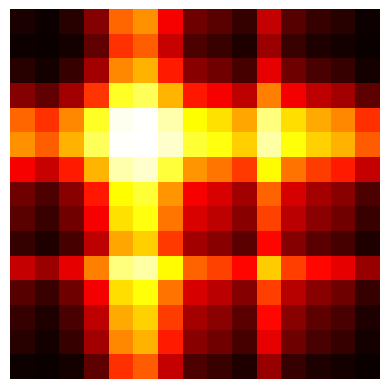

In [21]:
# function to view candlestick chart of labeled pattern
def display_pattern_image(signal, target):
    fontsize = 12
    plt.rcParams['xtick.labelsize'] = fontsize
    plt.rcParams['ytick.labelsize'] = fontsize

    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot2grid((1, 1), (0, 0))

    arr = np.c_[range(target.shape[0]), target[['open', 'max', 'min', 'close']].values]
    mpf.candlestick_ohlc(ax, arr, width=0.5, alpha=1, colordown='#ff1717', colorup='#53c156')

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('')

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()
def pattern_show_image(signal, target,folder_loc):
    fontsize = 12
    plt.rcParams['xtick.labelsize'] = fontsize
    plt.rcParams['ytick.labelsize'] = fontsize

    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot2grid((1, 1), (0, 0))
    num_rows = target.shape[0]

    arr = np.c_[range(target.shape[0]), target[['open', 'max', 'min', 'close']].values]
    mpf.candlestick_ohlc(ax, arr, width=0.5, alpha=1, colordown='#ff1717', colorup='#53c156')

    # Remove axis labels and title
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('')

    # Adjust margins
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Create a folder to save the plots if it doesn't exist
    folder_path = folder_loc
    os.makedirs(folder_path, exist_ok=True)

    # Generate a filename based on the current datetime and the signal name
    current_datetime = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    filename = f'{signal}_{current_datetime}.png'

    # Save the figure to the specified folder with the generated filename
    file_path = os.path.join(folder_path, filename)
    fig.savefig(file_path)

    plt.show()


# method that prints one image on the screen using GAF
def image_gaf(serie):
    max = np.amax(serie)
    min = np.amin(serie)
    result = serie_tiempo_gaf(serie,max,min)
    plt.imshow(result, cmap='hot', interpolation='nearest')
    plt.axis('off')
    plt.show()


# test, see image of gaf - opening values of japanese candlesticks in a double top pattern
serie = np.array(['1.44697','1.44678','1.4471','1.44761','1.44802','1.44803','1.4479','1.44752','1.44742','1.44721','1.4478','1.44741','1.44722','1.4471','1.44677']).astype(float)

image_gaf(serie)


# Obtain Japanese candlestick information and convert them to images using GAF

In this cell are defined three functions necessary to transform the time series of the Japanese candlesticks to images. For this, the time series structure of each pattern is processed to a multidimensional array with the characteristics of the Japanese candlesticks (open, min, max, close).
Then they are processed by applying the GAF method and adding them to a structured array for further handling.


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.




---



# Red CNN

The class of a convolutional neural network model is defined, in order to create an instance of it on which to work, establishing its characteristics and then training the model with the labeled data to identify the categorized patterns.

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow.keras.utils as np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Class to instantiate a CNN model
class modelCNN(object):

    # Sets the instance variables
    def __init__(self, data_x, data_y):
        self.model = None
        self.input_shape = None
        self.label_shape = None
        self.train_history = None
        self.data_x, self.data_y = data_x, data_y
        self.X_train, self.y_train, self.X_test, self.y_test = None, None, None, None
        self. y_categoricalTrain, self.y_categoricalTest = None, None

    # Divides the data into a test set and a test set
    def process(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split (self.data_x, self.data_y, test_size= 0.3, random_state = 42)
        self. y_categoricalTrain, self.y_categoricalTest = np_utils.to_categorical(self.y_train), np_utils.to_categorical(self.y_test)
        self.input_shape = self.X_train[0].shape
        self.label_shape = self. y_categoricalTrain.shape[1]

    # Set the layers and their characteristics that make up the CNN model
    def build(self):
        self.model = Sequential()
        self.model.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same', input_shape = self.input_shape, activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.label_shape, activation='softmax'))
        print(self.model.summary())

    # Training of the model created with the processed data
    def train(self, split):
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        X_train, X_val, y_train_categorical, y_val_categorical = train_test_split(self.X_train, self.y_categoricalTrain, test_size=split)

        self.train_history = self.model.fit(x = X_train, y = y_train_categorical, validation_data=(X_val, y_val_categorical), shuffle=True, epochs = 50, batch_size = 150, verbose = 2)

    # Prediction for a specific value with the trained model
    def predictTest(self,dataX):
        prediction = self.model.predict(dataX)
        print(prediction)
        #print(pd.crosstab(self.y_test, prediction, rownames=['label'], colnames=['predict']))

    # Save the created/trained model
    def save(self, filename):
        self.model.save(filename)

    # Displays training history
    def show_train_history(self, train_history, train, validation):
        plt.figure()
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

    # Prints out the accuracy values after the delivery it has had
    def show(self):
        self.show_train_history(self.train_history, 'loss', 'val_loss')
        self.show_train_history(self.train_history, 'accuracy', 'val_accuracy')
        score = self.model.evaluate(self.X_test, self.y_categoricalTest)
        print('Score of the Testing Data: {}'.format(score))







# Processing of the data using GAF and training of a CNN pattern identification model

For the creation of the model capable of identifying the labeled patterns, we proceed in this cell to occupy the previous class and the GAF functions, together with the generated data. In this way, we start loading the data of the categorized patterns from the repository to be processed with the functions of the previous cells. In this way, the data are transformed to images by the GAF method, which pass through a function that prepares them with the necessary format to enter the CNN.
After processing the data, an instance of the CNN model is created by passing the categorized values of the patterns to be identified, they are processed in the instance and the layers that the model will have to be trained are built. Finally, the network is trained and the model is downloaded for later use. It is also worth mentioning that during the training and at the end of it, the information of how much the network learns is shown.

Data shape: (255, 28, 28, 4)
Target shape: (255,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatt

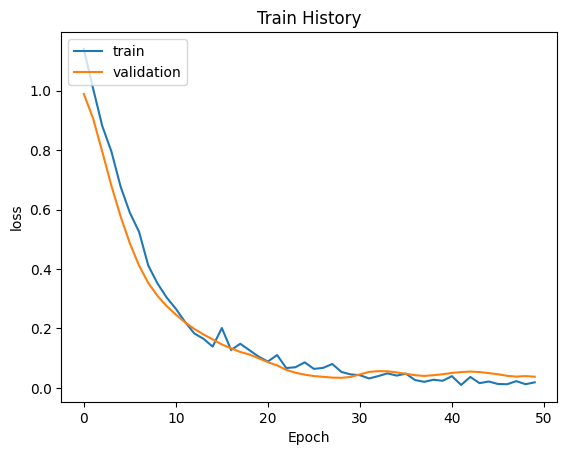

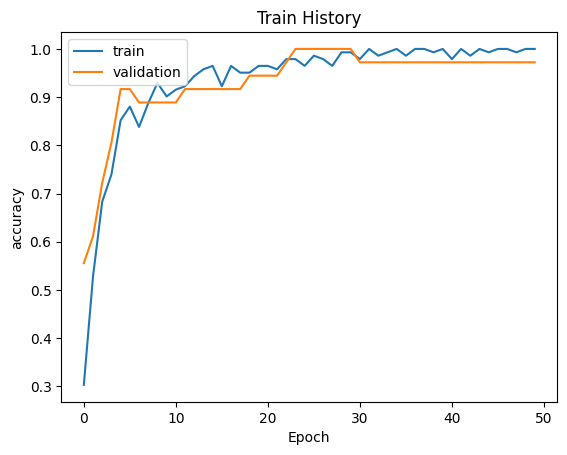

3/3 [==============================] - 0s 31ms/step - loss: 0.0979 - accuracy: 0.9610
Score of the Testing Data: [0.09786307066679001, 0.9610389471054077]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Function that creates a CNN model and trains it with the labeled data, at the end it displays the training results.
def cnn(dataDic):
  x_data = dataDic['data']
  y_target = dataDic['target']
  model = modelCNN(x_data, y_target)
  model.process()
  model.build()
  model.train(0.2)
  model.show()

  # Save model
  name = 'model_pattern'
  load_model = 'CNN_' + name + '.h5'
  model.save(load_model)

# Function that structures the data sets for use in the neural network.
# For each set, it is labeled differently from another one
def process_data(d1, d2, d3):
    total = d1.shape[0] + d2.shape[0] + d3.shape[0]

    xSerie = np.zeros((total, window, window, 4))

    xSerie[0:d1.shape[0], :, :, :] = d1
    xSerie[d1.shape[0]:d1.shape[0] + d2.shape[0], :, :, :] = d2
    xSerie[d1.shape[0] + d2.shape[0]:, :, :, :] = d3

    yData = [0] * d1.shape[0]
    yData.extend([1] * d2.shape[0])
    yData.extend([2] * d3.shape[0])

    ySerie = np.array(yData)

    assert xSerie.shape[0] == ySerie.shape[0], "Data and label counts don't match!"

    return {'data': xSerie, 'target': ySerie}



# Size of window in which it is predisposed to identify market patterns
window = 28

# Loads labeled pattern data
# Each set of patterns is structured into a time series that can be processed, to be transformed by the GAF method.
c_h_eurusd = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/S&H/patron_cabezaHombros_23_23_EURUSD.csv')))
c_h_gbpusd = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/S&H/patron_cabezaHombros_26_26_GBPUSD.csv')))
c_h_usdjpy = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/S&H/patron_cabezaHombros_31_31_USDJPY.csv')))
c_h_eurchf = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/S&H/patron_cabezaHombros_8_8_USDCHF.csv')))
tt_eurusd = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/dobleTop/patron_dobleT_21_21_GBPUSD.csv')))
tt_gbpusd = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/dobleTop/patron_dobleT_21_21_USDCHF.csv')))
tt_usdjpy = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/dobleTop/patron_dobleT_22_22_USDJPY.csv')))
tt_eurchf = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/Patterns by market/dobleTop/patron_dobleT_23_23_EURUSD.csv')))
rd_eurusd = create_gaf(create_serie(pd.read_csv('/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/Data/Tagged data/patron_random_80_80_EURUSD.csv')))

# Data from patterns that were tagged in parts are joined into a single set per tag
pattern_c_h_all = np.concatenate((c_h_eurusd, c_h_gbpusd, c_h_usdjpy, c_h_eurchf))
pattern_tt_all = np.concatenate((tt_eurusd, tt_gbpusd, tt_usdjpy, tt_eurchf))
dataDic = process_data(pattern_c_h_all, pattern_tt_all, rd_eurusd)
print("Data shape:", dataDic['data'].shape)
print("Target shape:", dataDic['target'].shape)

cnn(dataDic)







---





---



# Functions for labeling

In this cell the parameters and functions used for the processing of the financial market time series over a period of ten years are configured. To process this data and obtain the patterns to be used to train the network, the first step was to establish the window for identifying the patterns, as well as the time span to be taken into account, set in eighteen, and the number of candlesticks to be processed.

Then we defined the characteristics of the proportions of the trends that each pattern would have in order to define it according to its characteristics in the functions below. In the functions are defined both the functions to find according to the characteristics that define each pattern and to indicate the possible occurrence of one of them. Necessary functions are used for this, such as identifying the trend and defining it as a downtrend or an uptrend.

In [9]:
#var
window_range = 28

end_first_stretch_dt = 5
end_second_stretch_dt = 8
end_third_stretch_dt = 11
end_length_dt = 5
length_valle_dt = 3

end_first_stretch_sh = 7
end_second_stretch_sh = 11
end_third_stretch_sh = 15
end_fourth_stretch_sh = 19
end_fifth_stretch_sh = 23
end_length_sh = 7
length_valle_sh = 4

# Set the values necessary to define the characteristics of the searched pattern in a specific window range
def set_values_dt(window):
  if window % 2 == 1 or window < 16:
    return 1

  global end_first_stretch_dt
  global end_second_stretch_dt
  global end_third_stretch_dt
  global end_length_dt
  global length_valle_dt
  global window_range

  reservation = 2
  aux = int(((window/2)-reservation)/2)
  auxr = int((window - aux * 4) /2)
  end_first_stretch_dt = aux + auxr
  end_second_stretch_dt = end_first_stretch_dt + aux
  end_third_stretch_dt = end_second_stretch_dt + aux
  end_length_dt = int(end_first_stretch_dt)
  length_valle_dt = int(aux)
  window_range = window
  return 0


# Set the values necessary to define the characteristics of the searched pattern in a specific window range
def set_values_sh(window):
  if window % 2 == 1 or window < 16:
    return 1

  global end_first_stretch_sh
  global end_second_stretch_sh
  global end_third_stretch_sh
  global end_fourth_stretch_sh
  global end_fifth_stretch_sh
  global end_length_sh
  global length_valle_sh
  global window_range

  reservation = 2
  length_valle_sh = int((window-reservation)/6)
  end_length_sh = int(  (window - length_valle_sh*6)/2   )

  end_first_stretch_sh = end_length_sh + length_valle_sh
  end_second_stretch_sh = end_first_stretch_sh + length_valle_sh
  end_third_stretch_sh = end_second_stretch_sh + length_valle_sh
  end_fourth_stretch_sh = end_third_stretch_sh + length_valle_sh
  end_fifth_stretch_sh = end_fourth_stretch_sh + length_valle_sh
  window_range = window
  return 0

# Determines whether the existence of a pattern is possible according to the definition of its formation, given from a series of data, according to the length of the window.
def head_shoulders(series):
        y = series.values.reshape(-1,1)
        x = np.array(range(1, series.shape[0] + 1)).reshape(-1,1)
        if max(y[:end_second_stretch_sh]) > min(y[end_first_stretch_sh:end_third_stretch_sh]) and max(y[:end_second_stretch_sh]) < max(y[end_second_stretch_sh:end_fourth_stretch_sh]) and max(y[end_fourth_stretch_sh:window_range]) > min(y[end_third_stretch_sh:end_fifth_stretch_sh]) and max(y[end_fourth_stretch_sh:window_range]) < max(y[end_second_stretch_sh:end_fourth_stretch_sh]) and uptrend(y[:end_first_stretch_sh], x[:end_first_stretch_sh]) and downtrend(y[end_first_stretch_sh:end_second_stretch_sh], x[:length_valle_sh]) and uptrend(y[end_second_stretch_sh:end_third_stretch_sh], x[:length_valle_sh]) and downtrend(y[end_third_stretch_sh:end_fourth_stretch_sh], x[:length_valle_sh]) and uptrend(y[end_fourth_stretch_sh:end_fifth_stretch_sh], x[:length_valle_sh]) and downtrend(y[end_fifth_stretch_sh:window_range], x[:end_first_stretch_sh]):
          return True
        else:
          return False

# Determines whether the existence of a pattern is possible according to the definition of its formation, given from a series of data, according to the length of the window.
def double_top(series):
        y = series.values.reshape(-1,1)
        x = np.array(range(1, series.shape[0] + 1)).reshape(-1,1)
        if uptrend(y[:end_first_stretch_dt], x[:end_length_dt])  and downtrend(y[end_first_stretch_dt:end_second_stretch_dt], x[:length_valle_dt]) and uptrend(y[end_second_stretch_dt:end_third_stretch_dt], x[:length_valle_dt]) and downtrend(y[end_third_stretch_dt:window_range], x[:end_length_dt]) and (min(y[:end_first_stretch_dt]) < min(y[end_first_stretch_dt:end_third_stretch_dt])) and (min(y[end_first_stretch_dt:end_third_stretch_dt]) > min(y[end_third_stretch_dt:window_range])) and (max(y[:end_second_stretch_dt]) > max(y[end_second_stretch_dt:window_range])):
          return True
        else:
          return False

# Extracts randoms movements from the market
def randomPtt(series):
  n = random.randint(0,100)
  if n == 1:
    return True
  else:
    return False

# Determines the existence of a trend, according to a series of data
def is_tide(y,x):
  model = LinearRegression()
  model.fit(x, y)
  slope = model.coef_
  if slope > 0.0001:
    return True
  else:
    return False

def downtrend(y,x):
  newY = y[::-1]
  return is_tide(newY,x)

def uptrend(y,x):
  return is_tide(y,x)

# Get and label data

Once you have loaded the above cell functions you can proceed to execute this cell if you need to label the patterns of a particular market.

First connect to the data source and create a variable in this data which is "body", as the difference between the maximum and minimum value of the jaonesian candle to determine its body, which will be used to determine the trends. Then we proceed to pass this data using the functions of the previous cell to identify the possible appearance of a pattern, but without confirmation. With the data obtained, we proceed to go through all these possible patterns and visualize them one by one. In this way we proceed to manually label each pattern to confirm its characteristics as correct, attaching them at the end to a file that is used in the training of the neural network.

0.0    303
1.0      6
Name: double_top, dtype: int64
Count: 1/6


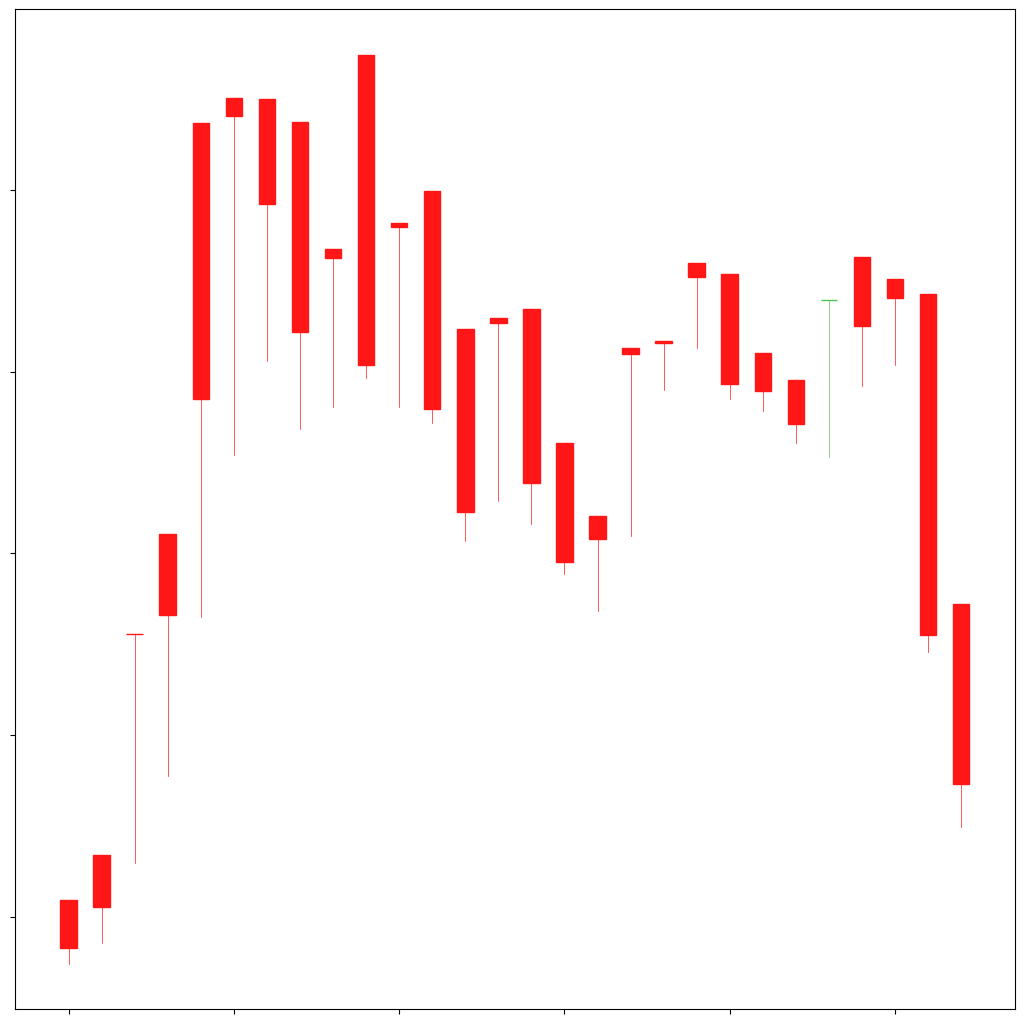

save to 
 1)exactly_right 
 2) kinda_right 
 3) exactly_wrong 
 4) kinda_wrong 
1
Counter: 1
            open           max           min         close
0   26309.048828  26274.212891  26282.712891  26282.712891
1   26334.250000  26285.695312  26305.371094  26305.371094
2   26455.556641  26329.406250  26455.554688  26455.554688
3   26510.560547  26377.673828  26466.412109  26466.412109
4   26736.787109  26465.251953  26584.966797  26584.966797
5   26750.701172  26554.173828  26740.730469  26740.730469
6   26750.179688  26605.703125  26692.416016  26692.416016
7   26737.554688  26568.613281  26621.660156  26621.660156
8   26667.693359  26580.912109  26662.480469  26662.480469
9   26774.623047  26596.388672  26603.957031  26603.957031
10  26681.974609  26580.441406  26679.933594  26679.933594
11  26699.716797  26571.638672  26579.402344  26579.402344
12  26623.837891  26507.119141  26523.003906  26523.003906
13  26629.740234  26528.919922  26626.847656  26626.847656
14  26634.742188  2651

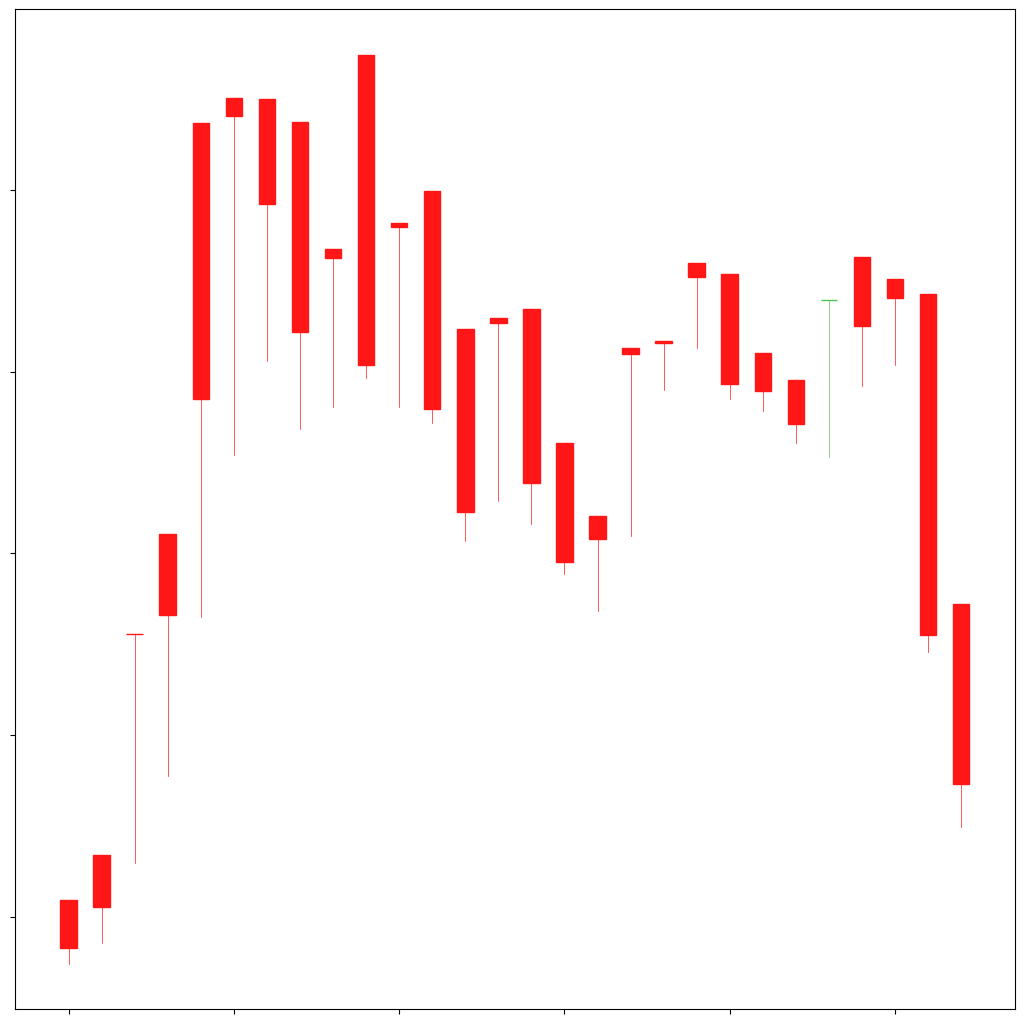

Count: 2/6


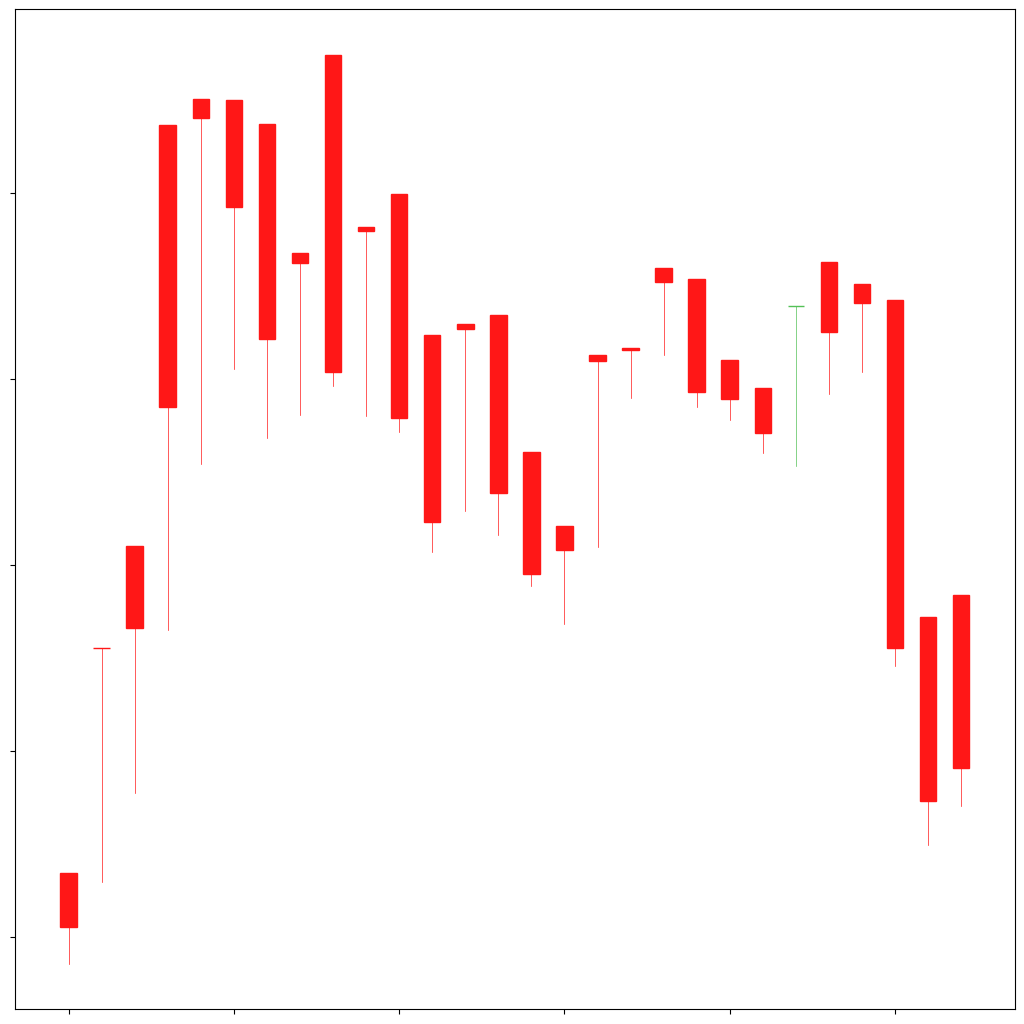

save to 
 1)exactly_right 
 2) kinda_right 
 3) exactly_wrong 
 4) kinda_wrong 
1
Counter: 2
            open           max           min         close
0   26309.048828  26274.212891  26282.712891  26282.712891
1   26334.250000  26285.695312  26305.371094  26305.371094
2   26455.556641  26329.406250  26455.554688  26455.554688
3   26510.560547  26377.673828  26466.412109  26466.412109
4   26736.787109  26465.251953  26584.966797  26584.966797
5   26750.701172  26554.173828  26740.730469  26740.730469
6   26750.179688  26605.703125  26692.416016  26692.416016
7   26737.554688  26568.613281  26621.660156  26621.660156
8   26667.693359  26580.912109  26662.480469  26662.480469
9   26774.623047  26596.388672  26603.957031  26603.957031
10  26681.974609  26580.441406  26679.933594  26679.933594
11  26699.716797  26571.638672  26579.402344  26579.402344
12  26623.837891  26507.119141  26523.003906  26523.003906
13  26629.740234  26528.919922  26626.847656  26626.847656
14  26634.742188  2651

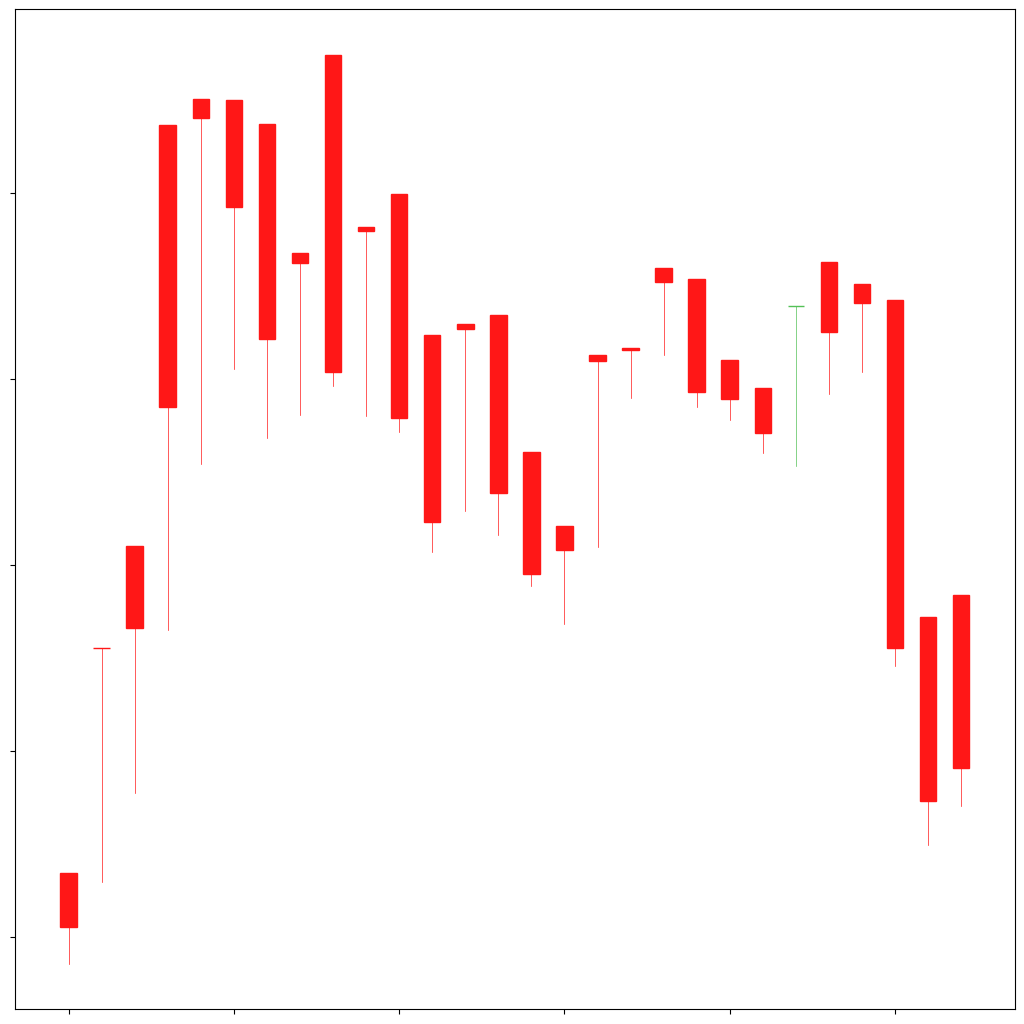

Count: 3/6


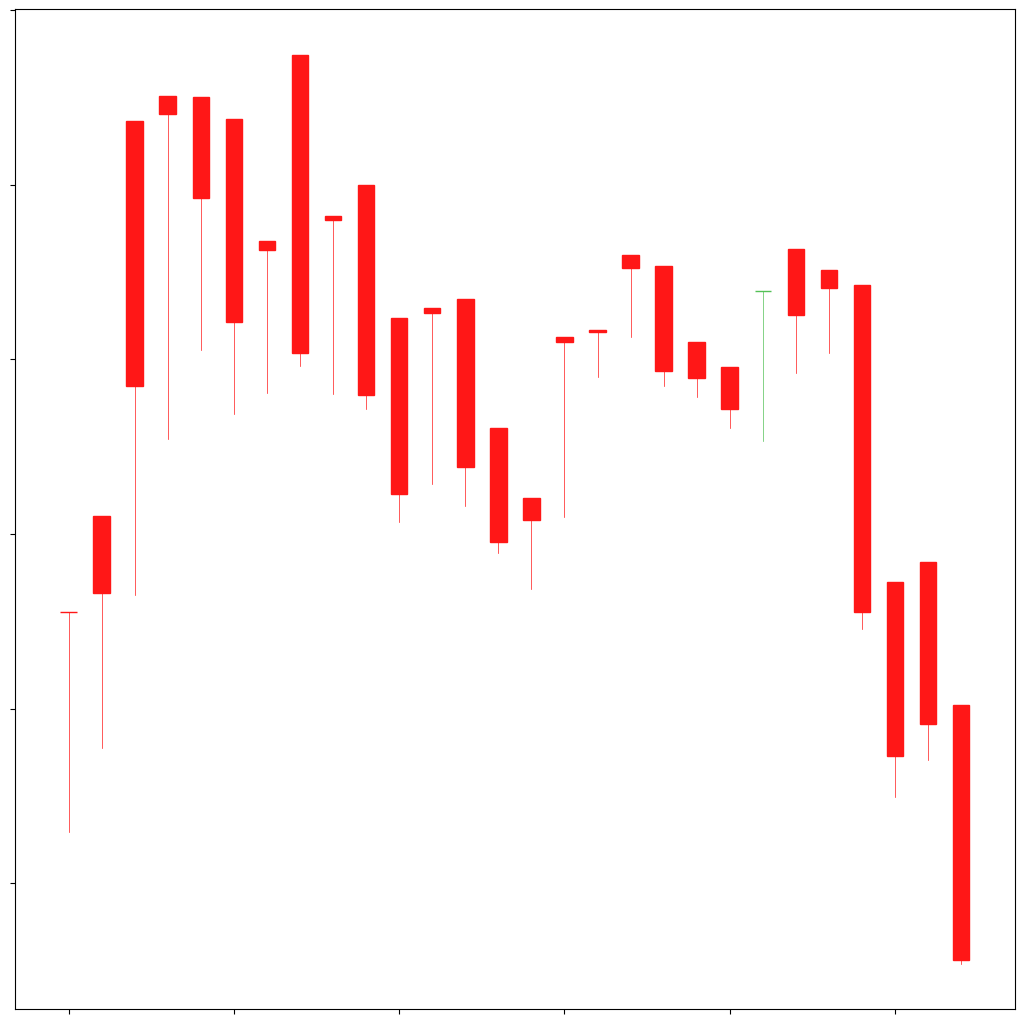

save to 
 1)exactly_right 
 2) kinda_right 
 3) exactly_wrong 
 4) kinda_wrong 
1
Counter: 3
            open           max           min         close
0   26309.048828  26274.212891  26282.712891  26282.712891
1   26334.250000  26285.695312  26305.371094  26305.371094
2   26455.556641  26329.406250  26455.554688  26455.554688
3   26510.560547  26377.673828  26466.412109  26466.412109
4   26736.787109  26465.251953  26584.966797  26584.966797
..           ...           ...           ...           ...
79  26651.185547  26603.947266  26640.888672  26640.888672
80  26642.832031  26445.763672  26455.292969  26455.292969
81  26472.291016  26349.265625  26373.003906  26373.003906
82  26484.009766  26370.654297  26391.048828  26391.048828
83  26402.164062  26253.914062  26256.017578  26256.017578

[84 rows x 4 columns]


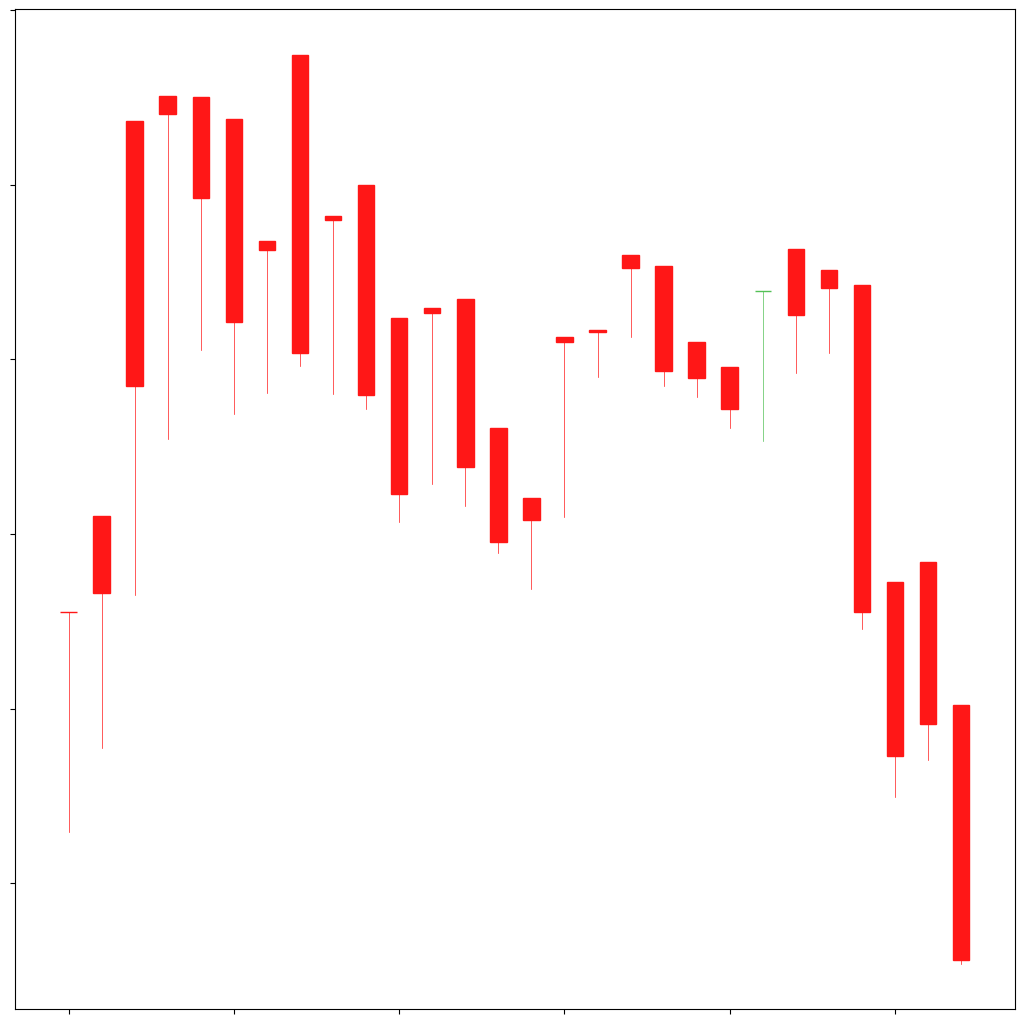

Count: 4/6


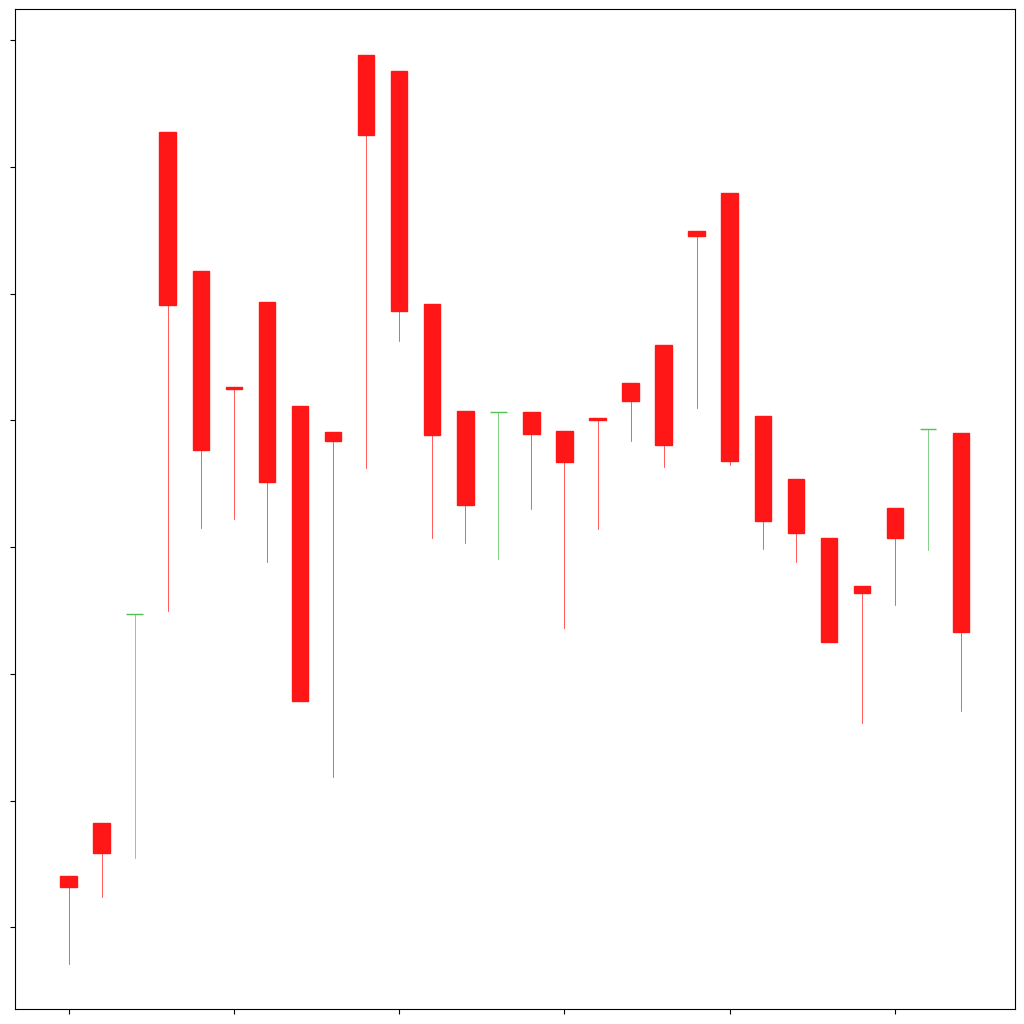

save to 
 1)exactly_right 
 2) kinda_right 
 3) exactly_wrong 
 4) kinda_wrong 
3
Counter: 4
             open           max           min         close
0    26309.048828  26274.212891  26282.712891  26282.712891
1    26334.250000  26285.695312  26305.371094  26305.371094
2    26455.556641  26329.406250  26455.554688  26455.554688
3    26510.560547  26377.673828  26466.412109  26466.412109
4    26736.787109  26465.251953  26584.966797  26584.966797
..            ...           ...           ...           ...
107  27106.894531  27024.943359  27024.943359  27024.943359
108  27069.250000  26960.917969  27063.982422  27063.982422
109  27130.896484  27054.300781  27107.220703  27107.220703
110  27193.121094  27097.656250  27193.121094  27193.121094
111  27190.494141  26971.001953  27033.171875  27033.171875

[112 rows x 4 columns]


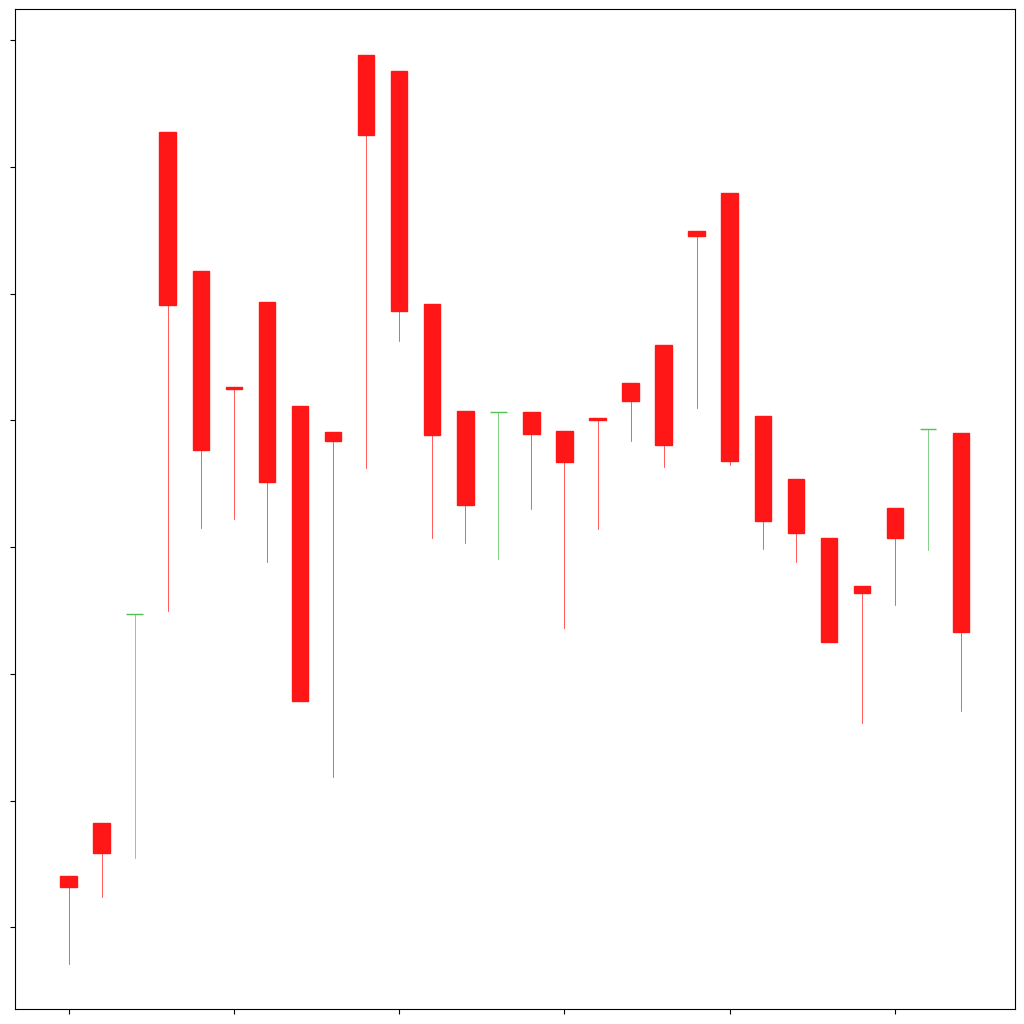

Count: 5/6


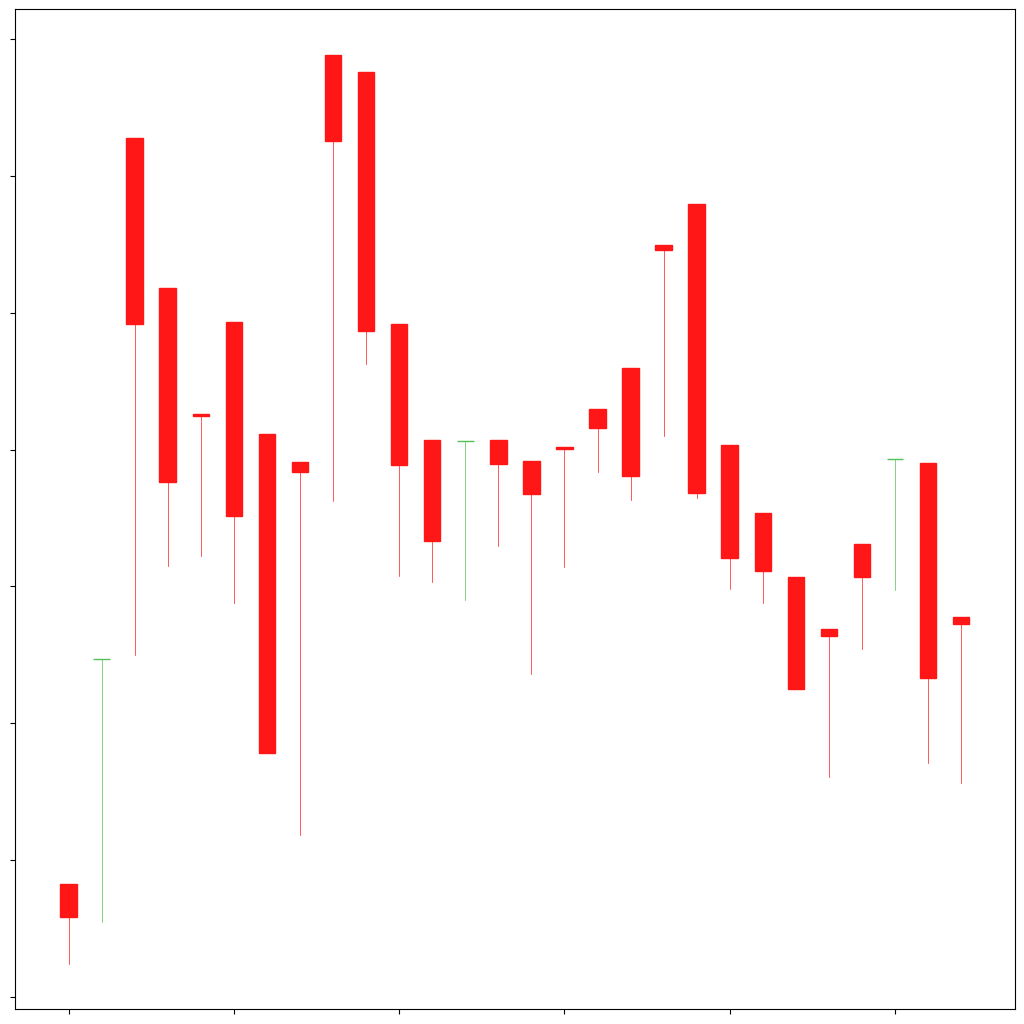

save to 
 1)exactly_right 
 2) kinda_right 
 3) exactly_wrong 
 4) kinda_wrong 
3
Counter: 5
             open           max           min         close
0    26309.048828  26274.212891  26282.712891  26282.712891
1    26334.250000  26285.695312  26305.371094  26305.371094
2    26455.556641  26329.406250  26455.554688  26455.554688
3    26510.560547  26377.673828  26466.412109  26466.412109
4    26736.787109  26465.251953  26584.966797  26584.966797
..            ...           ...           ...           ...
135  27069.250000  26960.917969  27063.982422  27063.982422
136  27130.896484  27054.300781  27107.220703  27107.220703
137  27193.121094  27097.656250  27193.121094  27193.121094
138  27190.494141  26971.001953  27033.171875  27033.171875
139  27077.388672  26956.585938  27072.365234  27072.365234

[140 rows x 4 columns]


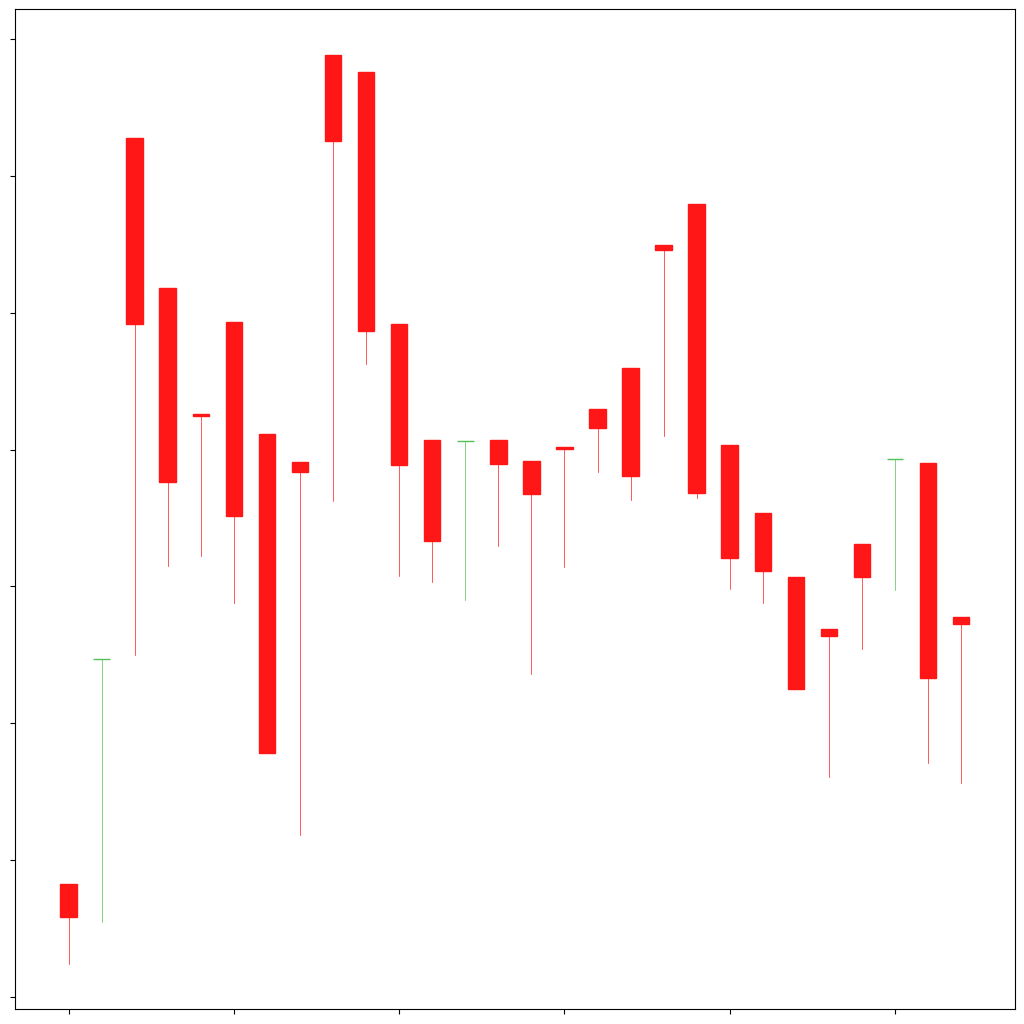

Count: 6/6


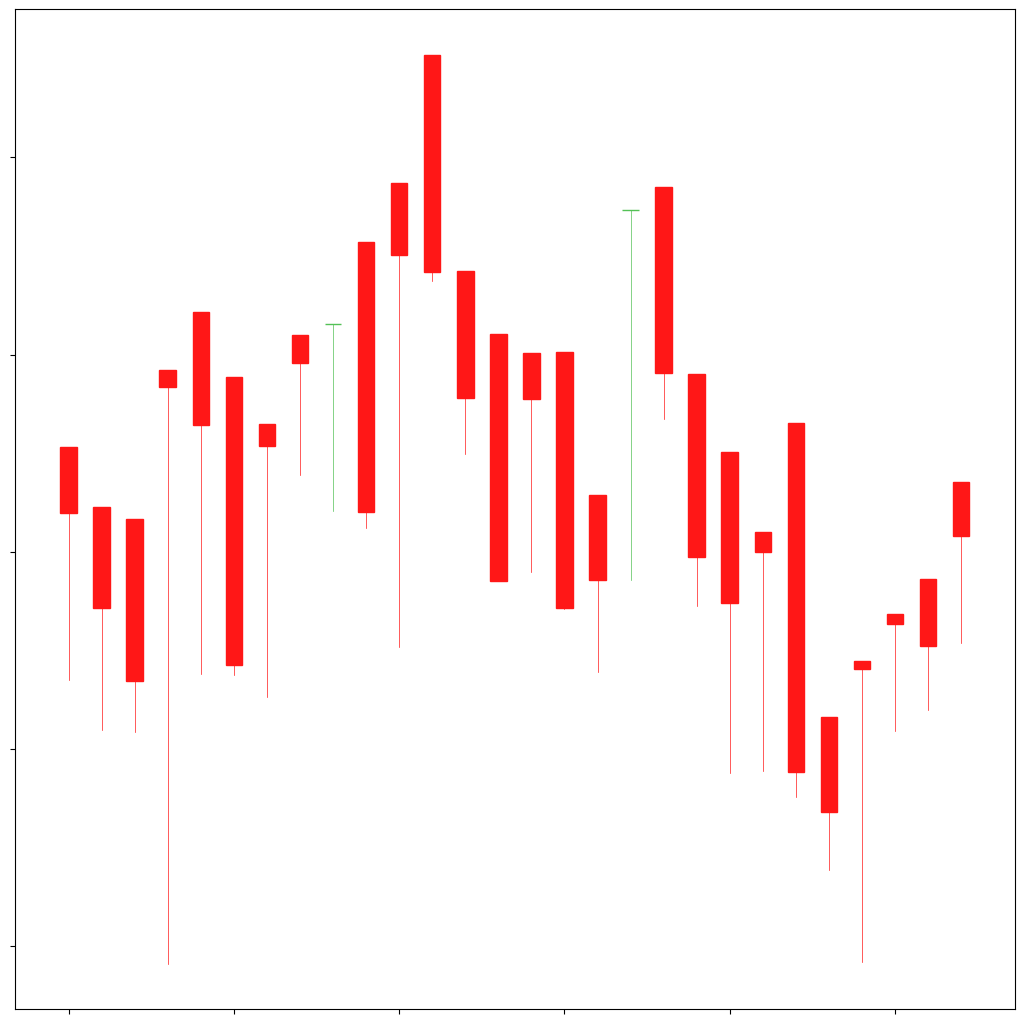

save to 
 1)exactly_right 
 2) kinda_right 
 3) exactly_wrong 
 4) kinda_wrong 
3
Counter: 6
             open           max           min         close
0    26309.048828  26274.212891  26282.712891  26282.712891
1    26334.250000  26285.695312  26305.371094  26305.371094
2    26455.556641  26329.406250  26455.554688  26455.554688
3    26510.560547  26377.673828  26466.412109  26466.412109
4    26736.787109  26465.251953  26584.966797  26584.966797
..            ...           ...           ...           ...
163  26558.150391  26519.169922  26534.062500  26534.062500
164  26572.412109  26495.931641  26570.251953  26570.251953
165  26584.322266  26554.628906  26581.666016  26581.666016
166  26593.023438  26559.988281  26576.162109  26576.162109
167  26617.777344  26576.794922  26604.052734  26604.052734

[168 rows x 4 columns]


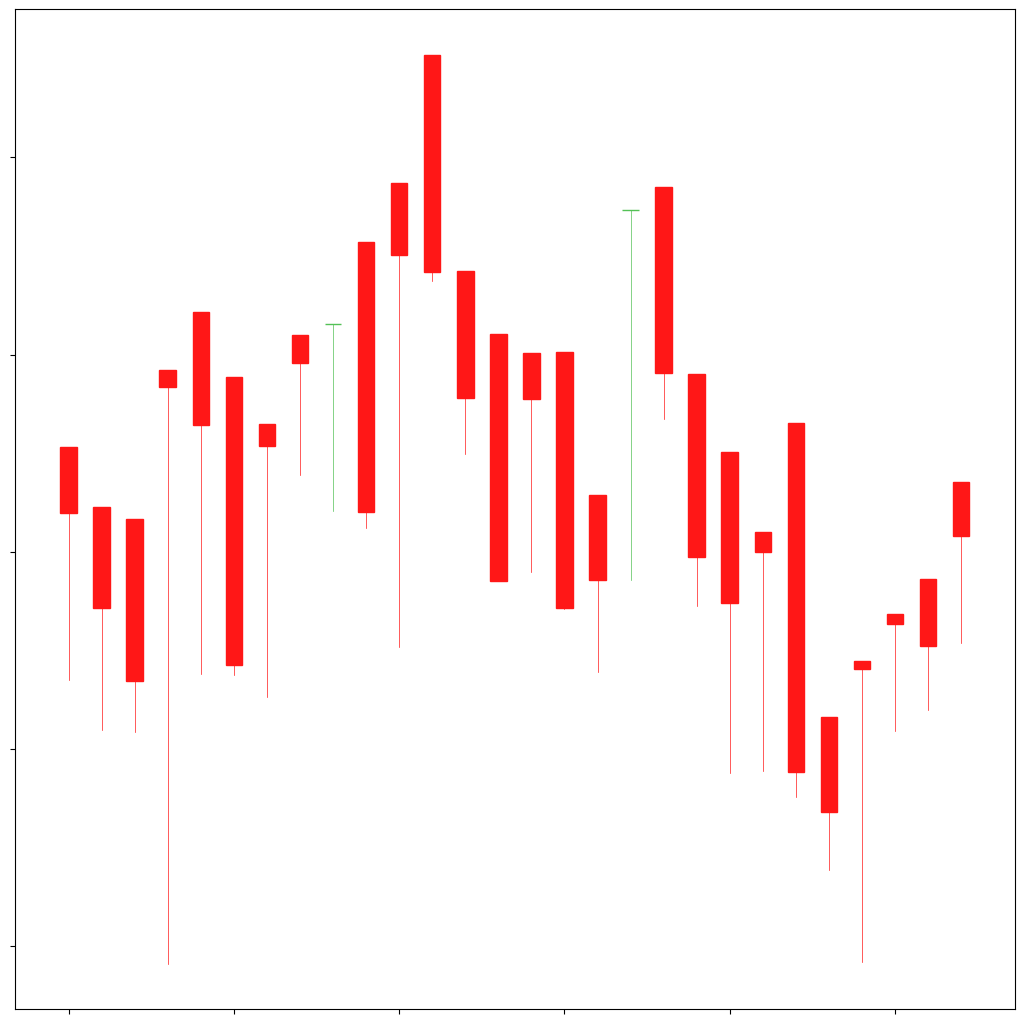

In [22]:
# Open file of one of the markets to be analyzed
df = pd.read_csv('btc-data.csv',
                 header=0, names=["datetime","open","max","min","close","volumen"])

# Name of the market
currency = 'BTCUSD'

# Add "body" field, being the difference between the closing and opening of the Japanese candlesticks.
df['body'] = np.where(df['close'] >= df['open'],
                               abs(df.close - df.open)/2 + df.open,
                               abs(df.close - df.open)/2 + df.close)

# Take the set of candles that appear in the imported dataset
df_copy = df.iloc[0:3900000].copy()

# Ensure the DataFrame's index is of type integer:
df_copy.reset_index(drop=True, inplace=True)

# Size of the window in which the pattern is observed
window_size = 28
set_values_dt(window_size)
set_values_sh(window_size)

# Name of pattern to be labeled
patternTag = 'double_top'

# Look for the possible occurrence of the previously defined pattern based on market movements
df_copy[patternTag] = df_copy['body'].rolling(window_size).apply(double_top)

# Print the number of possible patterns detected
allPatternCount = df_copy[patternTag].value_counts()
print(str(allPatternCount))


# Run through the detected patterns, one by one, to visually check if they add up to the labeled dataset
new_df = df_copy.loc[df_copy[patternTag] == True]
df_marks = pd.DataFrame()
counter = 0
aux = 1

count=0
for index in new_df.index:
    print('Count: ' + str(aux) + '/' + str(allPatternCount[1]))

    # Visualize the image of the found pattern first
    display_pattern_image(patternTag, df_copy.loc[index - (window_size - 1):index, 'open':'close'])

    print("save to \n 1)exactly_right \n 2) kinda_right \n 3) exactly_wrong \n 4) kinda_wrong ")
    resp = input()

    if resp == '1':
        folder_loc = '/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/exactly_correct'
    elif resp == '2':
        folder_loc = '/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/kinda_right'
    elif resp == '3':
        folder_loc = '/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/exactly_wrong'
    elif resp == '4':
        folder_loc = '/content/drive/MyDrive/python/deep learning/graphic_patterns_GAF_CNN/kinda_wrong'

    # Now save the plot to the specified folder location
    df_marks = pd.concat([df_marks, df_copy.loc[index - (window_size - 1):index, 'open':'close'].reset_index(drop=True)], ignore_index=True)
    counter += 1
    print('Counter: ' + str(counter))
    print(df_marks)
    # Save the image of the found pattern
    pattern_show_image(patternTag, df_copy.loc[index - (window_size - 1):index, 'open':'close'], folder_loc)
    aux += 1


